In [206]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Data Preprocessing

In [4]:
training=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    follow_links=False,
)

Found 122252 files belonging to 38 classes.


# Training image preprocessing

In [6]:
validation=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    follow_links=False,
)

Found 30674 files belonging to 38 classes.


In [183]:
training

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
# Check shape of one batch
for images, labels in training.take(1):
    print(images.shape)  # Should print something like (32, 128, 128, 3)


(32, 128, 128, 3)


# Building Model

### To avoid Overshooting
1. choose small learning rate default 0.001 we are taking 0.001
2. there may be chance of underfitting, so increase number of neuron
3. add more convolution layer to extrat more feature from images there may be possobility
that model  unable to capture relevent feature or model is  confusing due to lack of feature so feed with more feature

In [11]:
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D, Flatten, Input, Dropout
from tensorflow.keras.models import Sequential

In [12]:
model=tf.keras.models.Sequential()

In [13]:
# First Conv2D layer (input shape defined here)
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128, 128, 3]))

# Second Conv2D layer
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))

# MaxPooling layer
model.add(MaxPool2D(pool_size=2,strides=2))

D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# First Conv2D layer with input_shape
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))

# Second Conv2D layer
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))

# MaxPooling layer
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
# First Conv2D layer with input_shape
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=(128, 128, 3),))

# Second Conv2D layer
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))

# MaxPooling layer
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
# First Conv2D layer with input_shape
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))

# Second Conv2D layer
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))

# MaxPooling layer
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
# First Conv2D layer with input_shape
model.add(Conv2D(filters=512,kernel_size=3,padding='same',    activation='relu',
    input_shape=(128, 128, 3)
))

# Second Conv2D layer
model.add(Conv2D(
    filters=512,
    kernel_size=3,  
    activation='relu'
))

# MaxPooling layer
model.add(MaxPool2D(
    pool_size=2,
    strides=2
))

In [48]:
model.add(tf.keras.layers.Dropout(0.25)) 

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(units=1500,activation='relu'))

In [21]:
model.add(Dropout(0.4))

In [22]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

## Compliling Model

In [24]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training 

In [27]:
training_history=model.fit(x=training,validation_data=validation,epochs=10)

Epoch 1/10
3821/3821 ━━━━━━━━━━━━━━━━━━━━ 1947s 508ms/step - accuracy: 0.5298 - loss: 1.6257 - val_accuracy: 0.8994 - val_loss: 0.3039
Epoch 2/10
3821/3821 ━━━━━━━━━━━━━━━━━━━━ 1609s 421ms/step - accuracy: 0.9102 - loss: 0.2786 - val_accuracy: 0.9263 - val_loss: 0.2385
Epoch 3/10
3821/3821 ━━━━━━━━━━━━━━━━━━━━ 1958s 512ms/step - accuracy: 0.9536 - loss: 0.1415 - val_accuracy: 0.9594 - val_loss: 0.1329
Epoch 4/10
3821/3821 ━━━━━━━━━━━━━━━━━━━━ 1921s 503ms/step - accuracy: 0.9718 - loss: 0.0885 - val_accuracy: 0.9671 - val_loss: 0.1101
Epoch 5/10
3821/3821 ━━━━━━━━━━━━━━━━━━━━ 2588s 677ms/step - accuracy: 0.9801 - loss: 0.0623 - val_accuracy: 0.9568 - val_loss: 0.1490
Epoch 6/10
3821/3821 ━━━━━━━━━━━━━━━━━━━━ 1855s 486ms/step - accuracy: 0.9839 - loss: 0.0512 - val_accuracy: 0.9485 - val_loss: 0.1815
Epoch 7/10
3821/3821 ━━━━━━━━━━━━━━━━━━━━ 1856s 486ms/step - accuracy: 0.9862 - loss: 0.0421 - val_accuracy: 0.9736 - val_loss: 0.0918
Epoch 8/10
3821/3821 ━━━━━━━━━━━━━━━━━━━━ 1860s 487ms/s

## Model Evaluation

In [51]:
#model Evaluration on Training set
train_loss,train_acc=model.evaluate(training)

3821/3821 ━━━━━━━━━━━━━━━━━━━━ 517s 135ms/step - accuracy: 0.9934 - loss: 0.0235


In [53]:
print(train_loss,train_acc)

0.021765083074569702 0.9937342405319214


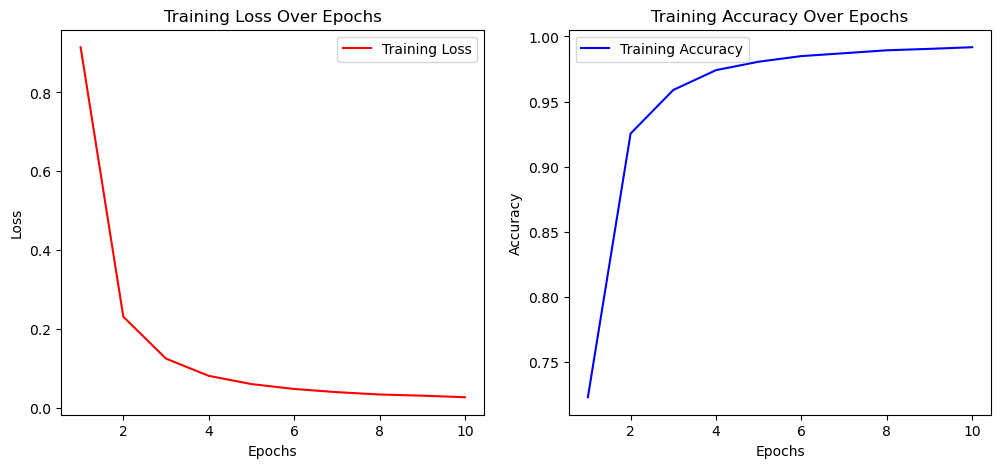

In [61]:
# Extract loss and accuracy values
train_loss = training_history.history['loss']
train_acc = training_history.history['accuracy']

epochs = range(1, len(train_loss) + 1)

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()

plt.show()

In [55]:
# model Evaluation on Vlidation set
val_loss,val_accuracy=model.evaluate(validation)

959/959 ━━━━━━━━━━━━━━━━━━━━ 131s 136ms/step - accuracy: 0.9682 - loss: 0.1322


In [59]:
print(val_loss,val_accuracy)

0.12867137789726257 0.9687683582305908


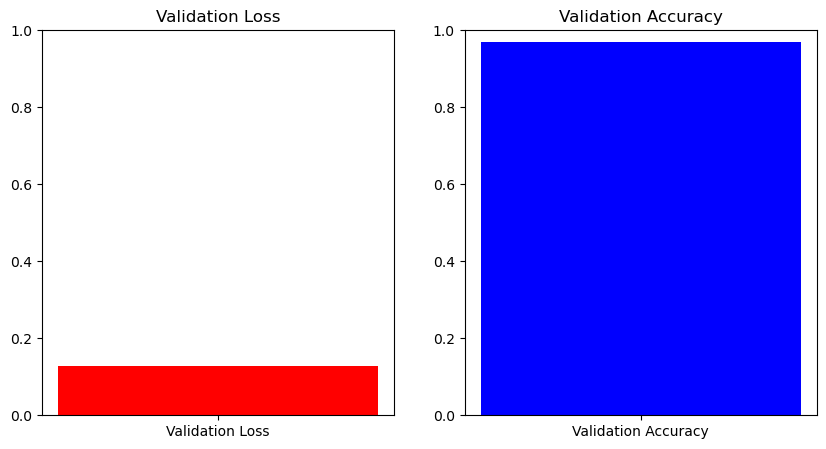

In [67]:
import matplotlib.pyplot as plt

# Your validation loss and accuracy
val_loss = 0.12867137789726257
val_accuracy = 0.9687683582305908

# 🔹 Bar Plot for Loss & Accuracy
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Validation Loss Bar
ax[0].bar(["Validation Loss"], [val_loss], color='red')
ax[0].set_ylim(0, 1)  # Adjust if needed
ax[0].set_title("Validation Loss")

# Validation Accuracy Bar
ax[1].bar(["Validation Accuracy"], [val_accuracy], color='blue')
ax[1].set_ylim(0, 1)  # Accuracy is between 0 and 1
ax[1].set_title("Validation Accuracy")

plt.show()


#### Accuracy visualization

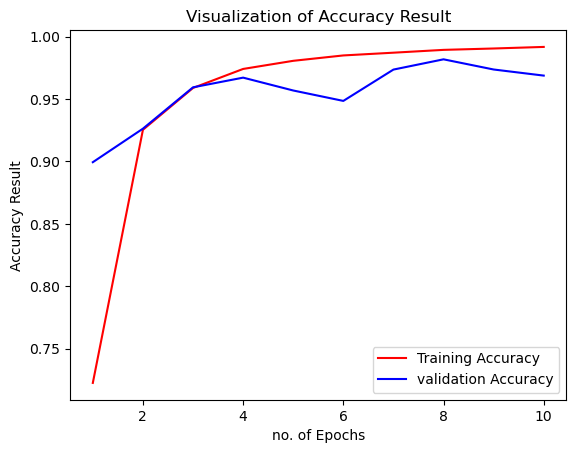

In [96]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='validation Accuracy')
plt.xlabel("no. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Metrics for Model Evaluation

In [153]:
from sklearn.metrics import classification_report,confusion_matrix

In [103]:
class_name=validation.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [110]:
test_set=validation=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    follow_links=False,
)

Found 30674 files belonging to 38 classes.


In [114]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

959/959 ━━━━━━━━━━━━━━━━━━━━ 113s 118ms/step


(array([[1.0000000e+00, 1.0242495e-15, 1.4056770e-15, ..., 7.7149113e-24,
         2.1332080e-20, 4.7281867e-18],
        [1.0000000e+00, 1.0242495e-15, 1.4056770e-15, ..., 7.7149113e-24,
         2.1332080e-20, 4.7281867e-18],
        [1.0000000e+00, 2.5307530e-14, 3.8865912e-15, ..., 3.1702528e-25,
         5.3206346e-23, 5.7450253e-20],
        ...,
        [5.7939545e-19, 5.9819961e-21, 4.2204467e-16, ..., 4.9261372e-22,
         2.8092015e-18, 1.0000000e+00],
        [5.3578747e-20, 7.9080066e-21, 1.1949166e-18, ..., 6.1983086e-22,
         3.6561826e-18, 1.0000000e+00],
        [5.3578747e-20, 7.9080066e-21, 1.1949166e-18, ..., 6.1983086e-22,
         3.6561826e-18, 1.0000000e+00]], dtype=float32),
 (30674, 38))

In [118]:
predicted_categories =tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(30674,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [120]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(30674, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [122]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(30674,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [137]:
print("Unique classes in y_true:", set(y_true.numpy()))
print("Expected classes:", list(range(38)))  # Expected classes from 0 to 37


Unique classes in y_true: {0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37}
Expected classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


In [143]:
print("Number of class names:", len(class_name))  # Should be 38
print("Class names:", class_name)


Number of class names: 38
Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-sp

In [145]:
class_name = class_name[:34]  # Adjust to match `y_true` classes


In [147]:
report = classification_report(
    y_true.numpy(),
    predicted_categories.numpy(),
    target_names=class_name[:34],  # Adjust class names
    labels=list(set(y_true.numpy()))  # Only include present classes
)
print(report)


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.93      0.95      1008
                                 Apple___Black_rot       1.00      0.98      0.99       994
                          Apple___Cedar_apple_rust       0.98      0.95      0.96       692
                                   Apple___healthy       0.89      0.97      0.93      1004
                               Blueberry___healthy       0.91      0.99      0.95       908
          Cherry_(including_sour)___Powdery_mildew       0.95      1.00      0.97       900
                 Cherry_(including_sour)___healthy       0.99      1.00      1.00       954
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       1.00      0.99      0.99       902
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       930
               Corn_(maize)___Northern_Leaf_Blight       0.99      0.98      0.

In [150]:
# Ensure the number of class names matches the number of unique classes
print("Unique classes in y_true:", len(set(y_true.numpy())))  # Should be 38

# Generate the classification report
report = classification_report(y_true.numpy(), predicted_categories.numpy(), target_names=class_name)
print(report)

Unique classes in y_true: 34
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.93      0.95      1008
                                 Apple___Black_rot       1.00      0.98      0.99       994
                          Apple___Cedar_apple_rust       0.98      0.95      0.96       692
                                   Apple___healthy       0.89      0.97      0.93      1004
                               Blueberry___healthy       0.91      0.99      0.95       908
          Cherry_(including_sour)___Powdery_mildew       0.95      1.00      0.97       900
                 Cherry_(including_sour)___healthy       0.99      1.00      1.00       954
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       1.00      0.99      0.99       902
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       930
               Corn_(maize)___Northern_Leaf_Blight

In [165]:
confusion=confusion_matrix(y_true,predicted_categories)
print(confusion)
confusion.shape

[[942   2   0 ...   0   0   0]
 [  0 974   0 ...   0   0   0]
 [  0   0 654 ...   0   0   0]
 ...
 [  0   0   0 ... 514   0   0]
 [  0   0   0 ...   0 888   0]
 [  0   0   0 ...   0   0 952]]


(34, 34)

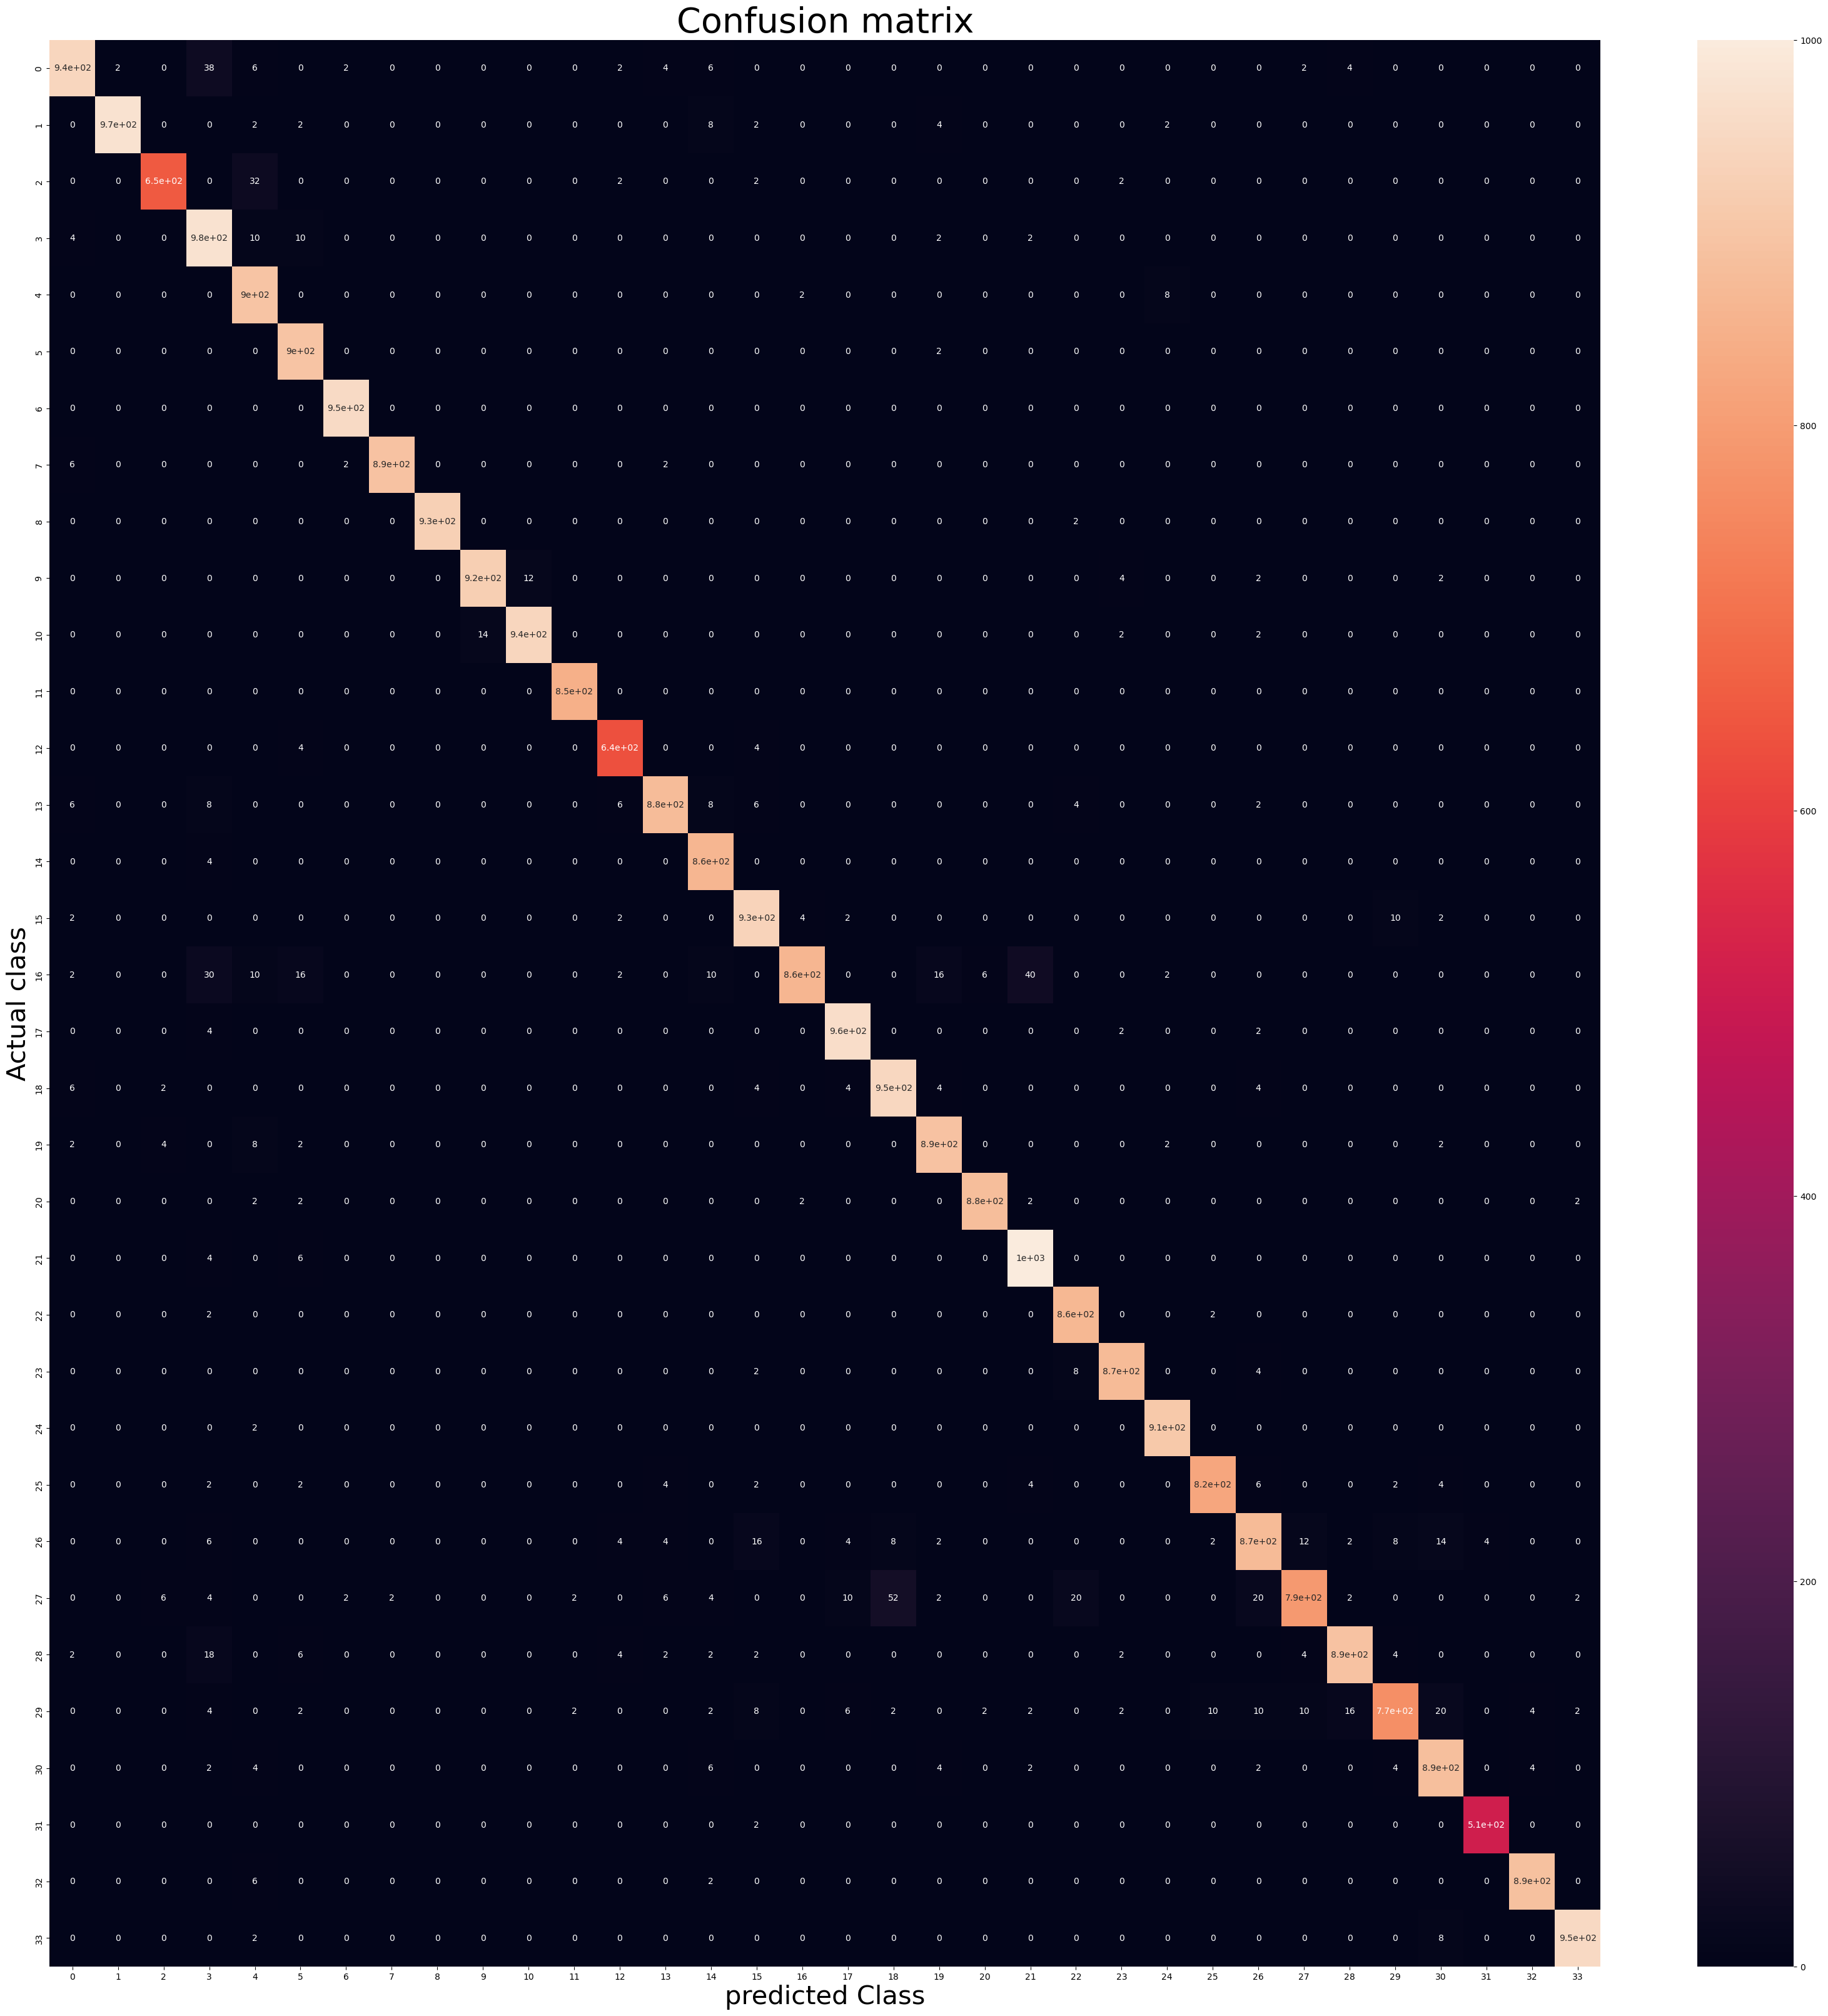

In [179]:
plt.figure(figsize=(40,40))
sns.heatmap(confusion,annot=True,annot_kws={'size':10})
plt.xlabel("predicted Class",fontsize=30)
plt.ylabel("Actual class",fontsize=30)
plt.title("Confusion matrix",fontsize=40)
plt.show()

## Prediction on new data

In [202]:
data_cat=['Apple___Apple_scab',
            'Apple___Black_rot',
            'Apple___Cedar_apple_rust',
            'Apple___healthy',
            'Blueberry___healthy',
            'Cherry_(including_sour)___Powdery_mildew',
            'Cherry_(including_sour)___healthy',
            'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
            'Corn_(maize)___Common_rust_',
            'Corn_(maize)___Northern_Leaf_Blight',
            'Corn_(maize)___healthy',
            'Grape___Black_rot',
            'Grape___Esca_(Black_Measles)',
            'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
            'Grape___healthy',
            'Orange___Haunglongbing_(Citrus_greening)',
            'Peach___Bacterial_spot',
            'Peach___healthy',
            'Pepper,_bell___Bacterial_spot',
            'Pepper,_bell___healthy',
            'Potato___Early_blight',
            'Potato___Late_blight',
            'Potato___healthy',
            'Raspberry___healthy',
            'Soybean___healthy',
            'Squash___Powdery_mildew',
            'Strawberry___Leaf_scorch',
            'Strawberry___healthy',
            'Tomato___Bacterial_spot',
            'Tomato___Early_blight',
            'Tomato___Late_blight',
            'Tomato___Leaf_Mold',
            'Tomato___Septoria_leaf_spot',
            'Tomato___Spider_mites Two-spotted_spider_mite',
            'Tomato___Target_Spot',
            'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
            'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

In [214]:
image_path=r"C:\Users\Lenovo\Desktop\Google hackthon\plant Disease prediction model\test\TomatoYellowCurlVirus6.JPG"
image=tf.keras.utils.load_img(image_path,target_size=(128,128))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

<function matplotlib.pyplot.show(close=None, block=None)>

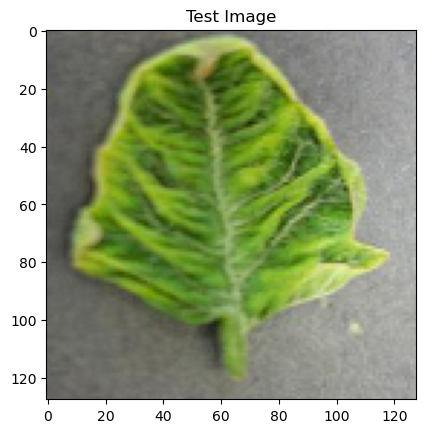

In [216]:
plt.imshow(image)
plt.title("Test Image")
plt.show

In [218]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [227]:
score=tf.nn.softmax(predict)

In [222]:
print('Accuracy: {} ({:.2f}%)'.format(data_cat[np.argmax(score)], np.max(score) * 100))


Accuracy: Tomato___Tomato_Yellow_Leaf_Curl_Virus (6.84%)


## Saving model

In [72]:
model.save("Disease_classification_model.keras")

In [74]:
training_history.history

{'accuracy': [0.7225567102432251,
  0.9253427386283875,
  0.9588718414306641,
  0.9741026759147644,
  0.9806138277053833,
  0.9849245548248291,
  0.9871249794960022,
  0.9893825650215149,
  0.9904868602752686,
  0.9917465448379517],
 'loss': [0.9147213101387024,
  0.2309701293706894,
  0.12462755292654037,
  0.08100920170545578,
  0.060078516602516174,
  0.04771671071648598,
  0.03959236666560173,
  0.033642955124378204,
  0.030678793787956238,
  0.026739194989204407],
 'val_accuracy': [0.899393618106842,
  0.9262567758560181,
  0.959379255771637,
  0.9671382904052734,
  0.9568364024162292,
  0.948490560054779,
  0.9735932946205139,
  0.9818087220191956,
  0.9736585021018982,
  0.9687683582305908],
 'val_loss': [0.30391573905944824,
  0.23853705823421478,
  0.132932648062706,
  0.11012247204780579,
  0.1490214467048645,
  0.1814599484205246,
  0.09180314838886261,
  0.06600800156593323,
  0.09961550682783127,
  0.12867137789726257]}

### Recording history in json

In [76]:
import json

In [80]:
with open("traning_hist.json",'w') as f:
    json.dump(training_history.history,f)